## Machine Learning A-Z™

© Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team |
[Super Data Science](http://www.superdatascience.com)

Part 9: Dimentionality Reduction | Section 44: Linear Discriminant Analysis (LDA)

Created on Apr  22, 2019
@author: yinka_ola

---

In [1]:
## ---

## Remember in Part 3 - Classification, we worked with datasets composed 
## of only two independent variables. We did for two reasons:

## 1. Because we needed two dimensions to visualize better how Machine Learning 
## models worked (by plotting the prediction regions and the prediction boundary 
## for each model).
## 2. Because whatever is the original number of our independent variables, 
## we can often end up with two independent variables by applying an appropriate 
## Dimensionality Reduction technique.

## There are two types of Dimensionality Reduction techniques:
## 1.Feature Selection
## 2.Feature Extraction

## Feature Selection techniques are Backward Elimination, Forward Selection, 
## Bidirectional Elimination, Score Comparison and more. 
## We covered these techniques in Part 2 - Regression.

## In this part we will cover the following Feature Extraction techniques:
## Linear Discriminant Analysis (LDA)



In [2]:
## ---

## Linear Discriminant Analysis (LDA):
## used as a dimentionality reduction technique
## used in preprocessing technique
## has the goal to project a dataset onto a lower-dimensional space

## LDA vs PCA:
## it finds the component acis with LDA
## we need axes that maximizes the separation b/t multiple classes
## project a feature space onto a small subspace while maintiaining the class-info
## PCA and LDA: linear transformation techniques used for dimentionality reductn
## PCA = unsuspervised
## LDA supervised b/c of relation to dependent variable
## LDA: we are looking for class separation b/t data

## summary:
## from n independent variable of dataset, LDA extracts p =< n new independent
## that separate the most, the classes of the dependent variable
## b/c dependent variable is considered, PCA = supervised learning model


## 5 main steps of LDA (same as PCA)

## ---

#Data Scenario: 
## winery collected information on its wine
## using clustering technique: created 3 customer segments
## 3 types of wine for each customer segment
## winery: take information + customer segment and create a classification model
## winery can predict which new wines to be recommended to each customer segment
## for visual representation: it cannot be done with 12 independent variables
## we needdimenality reduction techniques to extract 2-3 independent variables with most impact
## use PCA to pick 2-3 top influencial 
## the extrated features are called principal components

## ---

In [13]:
# Importing the libraries
import pandas as pd #data
import numpy as np #mathematics
import os
#plotting packages
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5
#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [14]:
## Data Preprocessing

# Importing the dataset
dataset = pd.read_csv('Wine.csv')

## independent variable
x = dataset.iloc[:, 0:13].values

## dependent variable
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
## must be applied when using dimensionality reduction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2) #lda is an object of LinearDiscriminantAnalysis class
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [16]:
# Fitting Logistic Regression to the Training set
## note: this can be any classification model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [20]:
## Observation
## have no incorrect predictions!
## here confusion matrix with 3 classes (3 x 3)
## here the diagonals contains the correct results
## 14 correct predictions of customer segment 1
## 16 correct predictions of customer segment 2
## 6 correct predictions of customer segment 3
## this is a perfect separability of our classes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


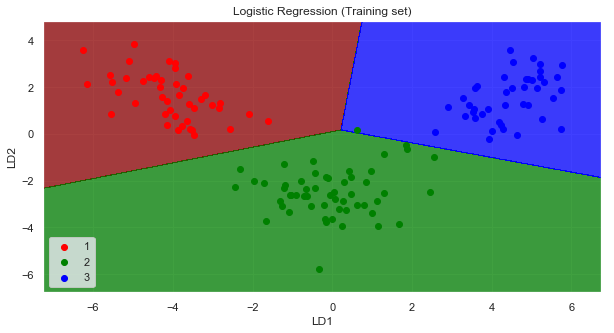

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


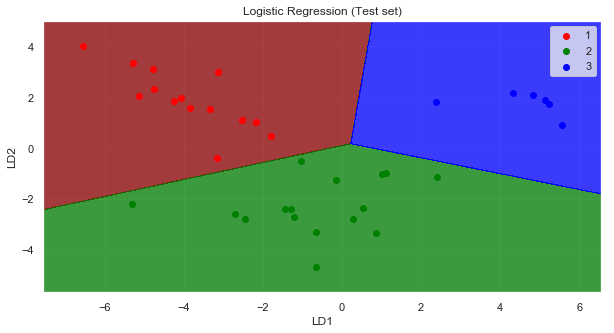

In [22]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkred', 'green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
## Observation:
## each wine is in the correct customer segment
## winery can use this result to correctly predict customer segment for new wines